In [1]:
#installing libs 
import pandas as pd
import numpy as np
import matplotlib. pyplot as pit
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
#for offline plotting I
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import sklearn

In [2]:
#import dataset
sensex= pd.read_csv("https://data.nasdaq.com/api/v3/datasets/BSE/SENSEX.csv?api_key=hQ1m5NeC8pAcFbhW5xBE&start_date=1991-01-03&end_date=2022-4-18")
sensex.head()

,Date,Open,High,Low,Close
0,2022-04-18,57338.58,57420.80,56842.39,57166.74
1,2022-04-13,58910.74,59003.82,58291.23,58338.93
2,2022-04-12,58743.50,58794.78,58298.57,58576.37
3,2022-04-11,59333.18,59355.76,58894.40,58964.57
4,2022-04-08,59256.97,59654.44,58876.36,59447.18


In [3]:
#data type null values entrires....all the mata data
sensex. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7591 non-null   object 
 1   Open    7574 non-null   float64
 2   High    7572 non-null   float64
 3   Low     7572 non-null   float64
 4   Close   7591 non-null   float64
dtypes: float64(4), object(1)
memory usage: 296.6+ KB


In [4]:
sensex[ 'Date'] = pd.to_datetime(sensex['Date'])

In [5]:
print(f'Dataframe contains stock prices between {sensex.Date.min()} {sensex.Date.max()}')
print(f'Total days = {(sensex.Date.max() - sensex.Date.min()).days}days')

Dataframe contains stock prices between 1991-01-03 00:00:00 2022-04-18 00:00:00
Total days = 11428days


In [6]:
sensex.describe()

,Open,High,Low,Close
count,7574.000000,7572.000000,7572.000000,7591.000000
mean,15572.276242,15669.530568,15450.602294,15527.180062
std,14133.737570,14194.704407,14037.068800,14112.824448
min,966.310000,966.310000,947.140000,956.110000
25%,3660.220000,3709.677500,3631.425000,3654.690000
50%,11319.990000,11393.280000,11140.210000,11145.180000
75%,24930.172500,25057.277500,24777.592500,24838.435000
max,62156.480000,62245.430000,61624.650000,61765.590000


<AxesSubplot:>

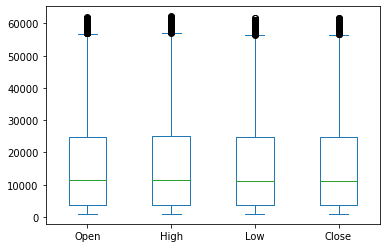

In [8]:
sensex[['Open','High','Low','Close']].plot(kind='box')

In [9]:
# Setting the Layout for our plot
layout =go.Layout(
title='Stock Prices of sensex',
xaxis=dict(
title='Date',
titlefont=dict(
family='Courier New, monospace',
size=18,
color='# 7f7f7f'
 )
),

yaxis=dict(
title='price',
titlefont=dict(
family='Courier New, monospace',
size=18,
color='#7f7f7f'
)
)
)

sensex_data = [{'x' :sensex[ 'Date'], 'y':sensex['Close' ]} ]

plot = go.Figure(data=sensex_data, layout=layout)

In [10]:
#plot(plot) #plotting offline
iplot(plot)

In [11]:
# Building the regression model
from sklearn.model_selection import train_test_split
#For preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [12]:
#Split the data into train and test sets
x = np.array (sensex. index). reshape(-1,1)
Y = sensex[ 'Close']
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.3,random_state=101)

In [13]:
# Feature scaling
scaler = StandardScaler().fit(x_train)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#Creating a Linear model
lm = LinearRegression()
lm.fit(x_train, Y_train)

LinearRegression()

In [16]:
#Plot actual and predicted values for traid dataset
trace0 = go.Scatter(
x = x_train. T[0],
y = Y_train,
mode = 'markers',
name = 'Actual'
)
trace1 = go.Scatter(
x = x_train.T[0],
y = lm.predict(x_train).T,
mode ='lines',
name ='Predicted'
)

sensex_data = [trace0,trace1]
layout . xaxis. title. text = 'Day'
plot2 = go. Figure(data=sensex_data, layout=layout)

In [17]:
iplot(plot2)

In [18]:
#Calculate scores for model evaluation
scores = f'''
{'metric'.ljust(10)} {'Train'.center(20)} {'Test'.center(20)}
{'r2_score' .ljust(10)}{r2_score(Y_train, lm.predict(x_train))}\t{r2_score(Y_test, lm.predict(x_test))}
{'MSE' .ljust(10) }{mse(Y_train, lm. predict(x_train))}\t{mse(Y_test, lm.predict(x_test))}
'''
print(scores)


metric            Train                 Test        
r2_score  0.8238979152577933	0.827676108563538
MSE       34982636.0056598	34508247.18835687

